In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns 

In [3]:

# Cargar la base de datos en un DataFrame
df = pd.read_csv('nba_salaries_&_stats.csv')

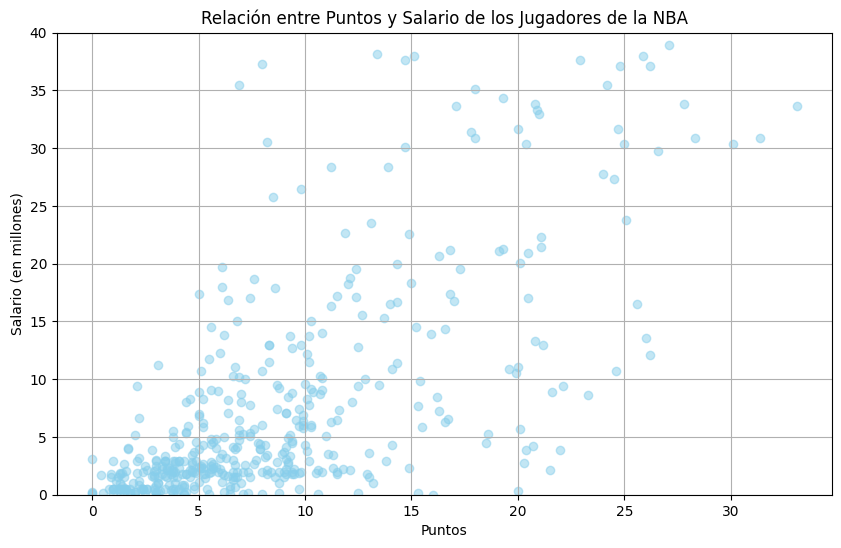

In [6]:
df['Salary_millions'] = df['Salary'] / 1000000  # Dividir por un millón

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['PTS'], df['Salary_millions'], color='skyblue', alpha=0.5)
plt.xlabel('Puntos')
plt.ylabel('Salario (en millones)')
plt.title('Relación entre Puntos y Salario de los Jugadores de la NBA')
plt.grid(True)  # Agregar cuadrícula al gráfico

# Establecer el límite superior del eje y en 40 para mostrar hasta 40 millones
plt.ylim(0, 40)

# Mostrar el gráfico
plt.show()

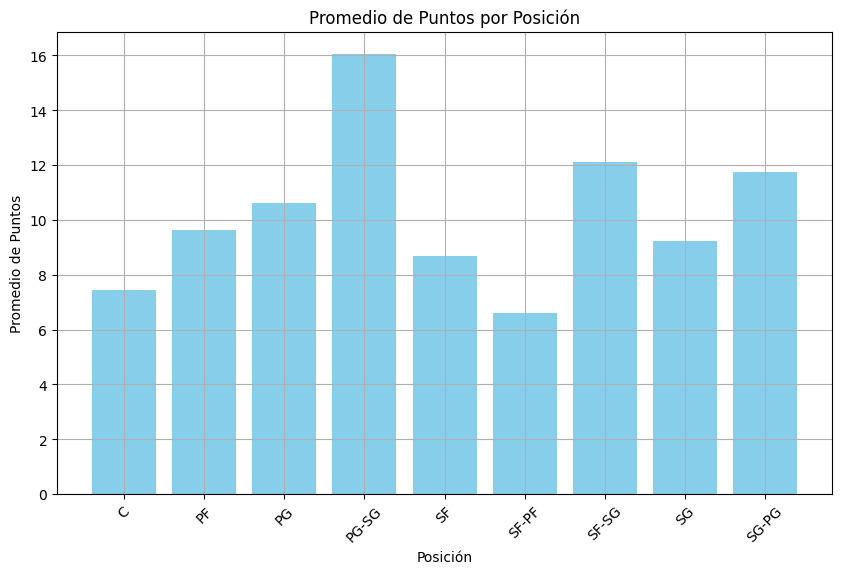

In [15]:
stats_por_posicion = df.groupby('Position').agg({'PTS': 'mean', 'Salary': 'mean'}).reset_index()

# Crear el gráfico de barras para los promedios de puntos
plt.figure(figsize=(10, 6))
plt.bar(stats_por_posicion['Position'], stats_por_posicion['PTS'], color='skyblue')
plt.xlabel('Posición')
plt.ylabel('Promedio de Puntos')
plt.title('Promedio de Puntos por Posición')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)  # Agregar cuadrícula al gráfico
plt.show()

In [14]:
print(stats_por_posicion)

  Position        PTS        Salary
3    PG-SG  16.050000  2.145853e+07
8    SG-PG  11.750000  1.665081e+07
6    SF-SG  12.100000  1.223976e+07
2       PG  10.635065  1.157957e+07
1       PF   9.625581  8.885045e+06
4       SF   8.674725  8.132253e+06
0        C   7.458242  7.282722e+06
7       SG   9.239130  6.681301e+06
5    SF-PF   6.600000  3.000000e+06


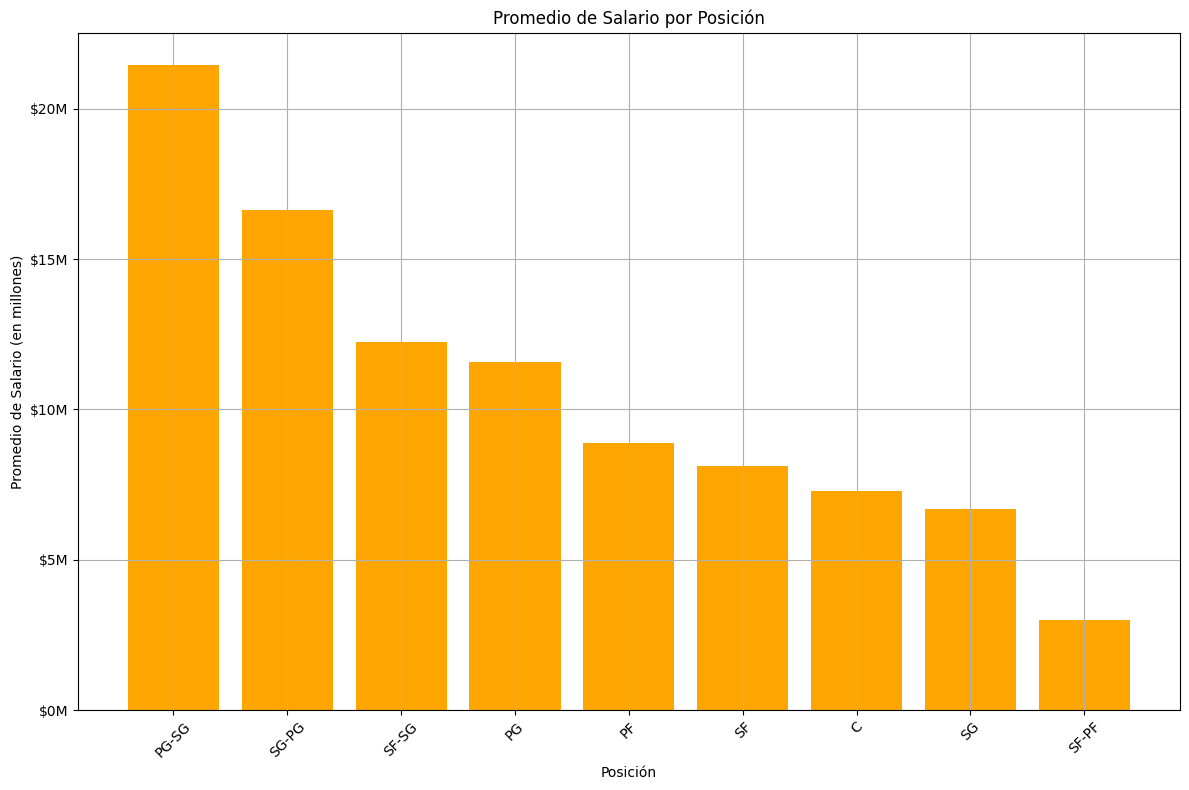

In [18]:
stats_por_posicion = df.groupby('Position').agg({'PTS': 'mean', 'Salary': 'mean'}).reset_index()

# Ordenar las posiciones por el promedio de salarios de forma descendente
stats_por_posicion = stats_por_posicion.sort_values(by='Salary', ascending=False)

# Crear el gráfico de barras verticales para los promedios de salarios
plt.figure(figsize=(12, 8))
plt.bar(stats_por_posicion['Position'], stats_por_posicion['Salary'], color='orange')
plt.ylabel('Promedio de Salario (en millones)')
plt.xlabel('Posición')
plt.title('Promedio de Salario por Posición')

# Formatear los números en el eje y para que se muestren en millones de dólares
formatter = FuncFormatter(lambda x, _: '${:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)  # Agregar cuadrícula al gráfico
plt.tight_layout()  # Ajustar el diseño de la figura para evitar superposiciones
plt.show()